In [20]:
# -*- coding:utf-8 -*-

# 常用包的函数
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime as dt

# 解决显示汉字不正确问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# mpl.font_manager.fontManager
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('precision', 6) #设置精度
pd.set_option('display.float_format', lambda x: '%.2f' % x) #为了直观的显示数字，不采用科学计数法
pd.options.display.max_rows = 100 #最多显示100行

In [92]:
salesdata_file = './111.csv'
#日期，客户编码，商品编码，商品条码，需求量，订购量，投放量，金额
cols_name = ['sales_id','seqno','barcode','item_name','amount','amoney','price','samll_amount','small_price','small_barcode','sales_date',
            'sales_type','shop_id','sale_time','time_stamp']
salesdata = pd.read_csv(salesdata_file,header=0,names=cols_name,
                        dtype={'shop_id':np.str,'sales_id': np.str,  'barcode': np.str,'small_barcode': np.str,'item_name': np.str, 'amount': np.float64,'samll_amount':np.float,
                               'sales_date': np.str, 'sales_type': np.str,'shop_id': np.str, 'sale_time': np.str,'time_stamp': np.str},
                       na_values={'samll_amount':'(null)'},error_bad_lines=False)
salesdata.head()

,sales_id,seqno,barcode,item_name,amount,amoney,price,samll_amount,small_price,small_barcode,sales_date,sales_type,shop_id,sale_time,time_stamp
0,01201601020001,75,6901028317177,玉溪（软）（条）,1.00,230.00,230.00,10.00,23.00,6901028317122,20160102,00,210202251576,20160102,20170326161400
1,01201601020001,76,6901028317122,玉溪（软）,1.00,23.00,23.00,1.00,23.00,6901028317122,20160102,00,210202251576,20160102,20170326161400
2,01201601020001,77,6901028314978,红塔山（硬经典）,3.00,22.50,7.50,3.00,7.50,6901028314978,20160102,00,210202251576,20160102,20170326161400
3,01201601020001,78,6901028046886,云烟（紫）,1.00,10.00,10.00,1.00,10.00,6901028046886,20160102,00,210202251576,20160102,20170326161400
4,01201601020001,79,6901028051873,云烟（神秘花园）,1.00,32.00,32.00,1.00,32.00,6901028051873,20160102,00,210202251576,20160102,20170326161400


In [79]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data = pd.read_csv('AirPassengers.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)
# salesdata['price'].astype(int).head()
# salesdata.head()
# new_sale = salesdata(lambda x:x.astype(int),salesdata['price'])
# new_sale
salesdata['amount'] = salesdata['amount'].apply(lambda x:int(x))
salesdata.head()

,sales_id,seqno,barcode,item_name,amount,amoney,price,samll_amount,small_price,small_barcode,sales_date,sales_type,shop_id,sale_time,time_stamp
0,01201601020001,75,6901028317177,玉溪（软）（条）,1,230.00,230.00,10.00,23.00,6901028317122,20160102,00,210202251576,20160102,20170326161400
1,01201601020001,76,6901028317122,玉溪（软）,1,23.00,23.00,1.00,23.00,6901028317122,20160102,00,210202251576,20160102,20170326161400
2,01201601020001,77,6901028314978,红塔山（硬经典）,3,22.50,7.50,3.00,7.50,6901028314978,20160102,00,210202251576,20160102,20170326161400
3,01201601020001,78,6901028046886,云烟（紫）,1,10.00,10.00,1.00,10.00,6901028046886,20160102,00,210202251576,20160102,20170326161400
4,01201601020001,79,6901028051873,云烟（神秘花园）,1,32.00,32.00,1.00,32.00,6901028051873,20160102,00,210202251576,20160102,20170326161400


In [162]:
# 选取指定的行
salesdata.ix[[0,2,4]]

,sales_id,seqno,barcode,item_name,amount,amoney,price,samll_amount,small_price,small_barcode,sales_date,sales_type,shop_id,sale_time,time_stamp
0,01201601020001,75,6901028317177,玉溪（软）（条）,1.00,230.00,230.00,10.00,23.00,6901028317122,20160102,00,210202251576,20160102,20170326161400
2,01201601020001,77,6901028314978,红塔山（硬经典）,3.00,22.50,7.50,3.00,7.50,6901028314978,20160102,00,210202251576,20160102,20170326161400
4,01201601020001,79,6901028051873,云烟（神秘花园）,1.00,32.00,32.00,1.00,32.00,6901028051873,20160102,00,210202251576,20160102,20170326161400


In [167]:
# 选取指定的列
dd = salesdata.ix[:,['barcode','item_name','amount']]
dd.head()

,barcode,item_name,amount
0,6901028317177,玉溪（软）（条）,1.00
1,6901028317122,玉溪（软）,1.00
2,6901028314978,红塔山（硬经典）,3.00
3,6901028046886,云烟（紫）,1.00
4,6901028051873,云烟（神秘花园）,1.00


In [168]:
# 选取指定的列和行
salesdata.ix[[0,2,4],['barcode','item_name','amount']].head()

,barcode,item_name,amount
0,6901028317177,玉溪（软）（条）,1.00
2,6901028314978,红塔山（硬经典）,3.00
4,6901028051873,云烟（神秘花园）,1.00


In [174]:
# 根据字段条件筛选
salesdata[salesdata['amoney'] <= 10].head()

,sales_id,seqno,barcode,item_name,amount,amoney,price,samll_amount,small_price,small_barcode,sales_date,sales_type,shop_id,sale_time,time_stamp
3,01201601020001,78,6901028046886,云烟（紫）,1.00,10.00,10.00,1.00,10.00,6901028046886,20160102,00,210202251576,20160102,20170326161400
8,01201601020001,83,6901028071765,中南海（金8mg）,1.00,7.00,7.00,1.00,7.00,6901028071765,20160102,00,210202251576,20160102,20170326161400
26,01201601030001,252,6901028071468,中南海（5mg）,1.00,10.00,10.00,1.00,10.00,6901028071468,20160103,00,210202251576,20160103,20170326161400
31,01201601030001,257,6901028001465,双喜（软国际）,1.00,6.50,6.50,1.00,6.50,6901028001465,20160103,00,210202251576,20160103,20170326161400
34,01201601040001,394,6901028046886,云烟（紫）,1.00,10.00,10.00,1.00,10.00,6901028046886,20160104,00,210202251576,20160104,20170326161400


In [188]:
# 复合条件
salesdata[(salesdata['amoney'] <= 10) & (salesdata['amount'] == 1)].head()

,sales_id,seqno,barcode,item_name,amount,amoney,price,samll_amount,small_price,small_barcode,sales_date,sales_type,shop_id,sale_time,time_stamp
3,01201601020001,78,6901028046886,云烟（紫）,1.00,10.00,10.00,1.00,10.00,6901028046886,20160102,00,210202251576,20160102,20170326161400
8,01201601020001,83,6901028071765,中南海（金8mg）,1.00,7.00,7.00,1.00,7.00,6901028071765,20160102,00,210202251576,20160102,20170326161400
26,01201601030001,252,6901028071468,中南海（5mg）,1.00,10.00,10.00,1.00,10.00,6901028071468,20160103,00,210202251576,20160103,20170326161400
31,01201601030001,257,6901028001465,双喜（软国际）,1.00,6.50,6.50,1.00,6.50,6901028001465,20160103,00,210202251576,20160103,20170326161400
34,01201601040001,394,6901028046886,云烟（紫）,1.00,10.00,10.00,1.00,10.00,6901028046886,20160104,00,210202251576,20160104,20170326161400


In [190]:
# 选择指定列
salesdata[(salesdata['amoney'] <= 10) & (salesdata['amount'] == 1)][['item_name','amount']].head()

,item_name,amount
3,云烟（紫）,1.00
8,中南海（金8mg）,1.00
26,中南海（5mg）,1.00
31,双喜（软国际）,1.00
34,云烟（紫）,1.00


In [196]:
np.random.seed(1234)
d1 = pd.Series(2*np.random.normal(size = 100)+3)
d1.count()

100

In [197]:
d1.min()

-4.1270333212494705

In [198]:
d1.max()

7.7819210309260658

In [200]:
# 最大值的位置
d1.idxmax()

39

In [201]:
# 最小值的位置
d1.idxmin()

81

In [202]:
# 10%分位数
d1.quantile(.1)

0.6870184644069928

In [203]:
d1.sum()

307.0224566250874

In [204]:
d1.mean()

3.070224566250874

In [205]:
# 中位数
d1.median()

3.204555266776845

In [206]:
# d1.mode()

0    -4.13
1    -1.80
2    -1.49
3    -1.15
4    -1.04
5    -0.63
6    -0.09
7     0.11
8     0.20
9     0.62
10    0.69
11    0.71
12    0.86
13    0.94
14    1.05
15    1.15
16    1.21
17    1.43
18    1.56
19    1.69
20    1.73
21    1.83
22    1.87
23    1.90
24    1.98
25    2.06
26    2.14
27    2.20
28    2.20
29    2.31
30    2.33
31    2.35
32    2.37
33    2.58
34    2.59
35    2.63
36    2.71
37    2.73
38    2.76
39    2.80
40    2.84
41    2.86
42    2.93
43    3.00
44    3.03
45    3.04
46    3.07
47    3.08
48    3.15
49    3.16
50    3.25
51    3.31
52    3.33
53    3.39
54    3.42
55    3.43
56    3.45
57    3.50
58    3.54
59    3.58
60    3.62
61    3.67
62    3.71
63    3.81
64    3.92
65    3.93
66    3.94
67    4.05
68    4.06
69    4.11
70    4.13
71    4.26
72    4.35
73    4.41
74    4.41
75    4.51
76    4.53
77    4.63
78    4.68
79    4.68
80    4.72
81    4.73
82    4.77
83    4.91
84    4.97
85    4.98
86    5.07
87    5.09
88    5.10
89    5.12
90    5.30

In [207]:
# 方差
d1.var()

4.005609378535085

In [208]:
# 标准差
d1.std()

2.0014018533355777

In [209]:
# 平均绝对值
d1.mad()

1.5112880411556109

In [210]:
# 偏度
d1.skew()

-0.64947807604842933

In [211]:
# 峰度
d1.kurt()

1.2201094052398012

In [212]:
d1.describe()

count   100.00
mean      3.07
std       2.00
min      -4.13
25%       2.04
50%       3.20
75%       4.43
max       7.78
dtype: float64

In [67]:
ss = filter(lambda arg: arg['amount'] > 1, salesdata)

'<filter object at 0x000001A9BF21E160>'

In [65]:
from functools import reduce


li = [11, 22, 33]

result = reduce(lambda arg1, arg2: arg1 + arg2, li)

66

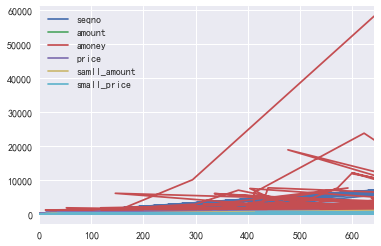

In [93]:
reduce(lambda arg1, arg2: arg1 + arg2, salesdata['amount'])
ss = salesdata.sort_values('amount')
ss.tail()
ss.plot()

In [94]:
df = DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
                   columns=['a', 'b'])
df

,a,b
0,1,1
1,2,10
2,3,100
3,4,100


In [113]:
df.quantile(.2)

a   1.60
b   6.40
Name: 0.2, dtype: float64

In [114]:
df.quantile([.25,.5,1])

,a,b
0.25,1.75,7.75
0.50,2.50,55.00
1.00,4.00,100.00


In [136]:
arr1 = np.arange(10)
arr1
# type(arr1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [137]:
s1 = pd.Series(arr1)
s1
# type(s1)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [139]:
dic1 = {'a':10,'b':20,'c':30,'d':40,'e':50}
dic1
# type(dic1)

{'a': 10, 'b': 20, 'c': 30, 'd': 40, 'e': 50}

In [140]:
s2 = pd.Series(dic1)
s2
# type(s2)

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [141]:
arr2 = np.array(np.arange(12)).reshape(4,3)
arr2
# type(arr2)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [142]:
df1 = pd.DataFrame(arr2)
df1
# type(df1)

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [135]:
dic2 = {'a':[1,2,3,4],'b':[5,6,7,8],'c':[9,10,11,12],'d':[13,14,15,16]}
dic2

{'a': [1, 2, 3, 4],
 'b': [5, 6, 7, 8],
 'c': [9, 10, 11, 12],
 'd': [13, 14, 15, 16]}

In [143]:
df2 = pd.DataFrame(dic2)
df2

,a,b,c,d
0,1,5,9,13
1,2,6,10,14
2,3,7,11,15
3,4,8,12,16


In [145]:
dic3 = {'one':{'a':1,'b':2,'c':3,'d':4},'two':{'a':5,'b':6,'c':7,'d':8},'three':{'a':9,'b':10,'c':11,'d':12}}
dic3

{'one': {'a': 1, 'b': 2, 'c': 3, 'd': 4},
 'three': {'a': 9, 'b': 10, 'c': 11, 'd': 12},
 'two': {'a': 5, 'b': 6, 'c': 7, 'd': 8}}

In [147]:
df = DataFrame(dic3)
df

,one,three,two
a,1,9,5
b,2,10,6
c,3,11,7
d,4,12,8


In [148]:
df4 = df[['one','three']]
df4

,one,three
a,1,9
b,2,10
c,3,11
d,4,12


In [150]:
s4 = pd.Series(np.array([1,1,2,3,5,8]))
s4

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int32

In [151]:
s4.index

RangeIndex(start=0, stop=6, step=1)

In [153]:
s4.reset_index

<bound method Series.reset_index of 0    1
1    1
2    2
3    3
4    5
5    8
dtype: int32>

In [154]:
s4

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int32

In [155]:
s4.index=['a','b','c','d','e','f']
s4

a    1
b    1
c    2
d    3
e    5
f    8
dtype: int32

In [157]:
s4.reset_index
s4

a    1
b    1
c    2
d    3
e    5
f    8
dtype: int32

In [158]:
s4[3]

3

In [160]:
s4['e']

5

In [161]:
s4[:4]

a    1
b    1
c    2
d    3
dtype: int32